In [1]:
from sklearn.datasets import make_classification
from sklearn.datasets import make_blobs

In [2]:
#We created a dataset with two features, two classes and 1000 samples.
traindata, trainlabel= make_classification(n_samples=1000, n_features=2,n_informative=2, n_redundant=0, n_repeated=0, n_classes=2)

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split

#Here we are printing our dataset.
print("OUR DATASET 3")
dataset = pd.DataFrame({'X1': traindata[:, 0], 'X2': traindata[:, 1], 'target': trainlabel[:] })
print(dataset)


OUR DATASET 3
           X1        X2  target
0   -0.798474  1.827717       0
1   -0.690190 -0.961689       0
2    0.391012 -0.714883       1
3    2.059709  0.429004       1
4   -0.314535 -0.869357       0
..        ...       ...     ...
995  0.596815 -1.433426       1
996  2.214817 -0.959773       1
997  0.612266  1.012630       1
998  0.898680  0.907375       1
999 -0.518943 -2.221687       1

[1000 rows x 3 columns]


In [4]:
import numpy as np
noise = np.random.normal(0, 0.5, traindata.shape)
noiseData = traindata + noise
print(noiseData)

[[-0.67100818  2.25522514]
 [-0.82064086 -0.67264364]
 [-0.36989245 -0.95080956]
 ...
 [ 0.53672732  0.95665009]
 [ 0.78858129  0.71846535]
 [ 0.18230585 -1.57365679]]


In [5]:
#We are splitting our dataset as 0.33% test data, 0.67% train data.

print("Information about splitted dataset")
X_train, X_test, y_train, y_test = train_test_split(noiseData, trainlabel, test_size=0.33)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

Information about splitted dataset
(670, 2) (330, 2) (670,) (330,)


In [6]:
#Finding best K value in range 1 to 33 with incrementing 2 by 2.

from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier

k_range =range(1, 33, 2)

testing_accuracy_scores=[]
training_accuracy_scores=[]

best_k= 0
max_val =0

for k in k_range:
        knn =KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        
        y_training_pred =knn.predict(X_train)
        train_score= metrics.accuracy_score(y_train, y_training_pred)
        training_accuracy_scores.append(train_score)
        
        y_test_pred =knn.predict(X_test)
        test_score= metrics.accuracy_score(y_test, y_test_pred)
        testing_accuracy_scores.append(test_score)
        
        if test_score > max_val:
            max_val =test_score;
            best_k =k;

#Our best key value            
print("Best key for our third dataset: ", best_k)

Best key for our third dataset:  3


Training-Testing Accurracy graph according to K value


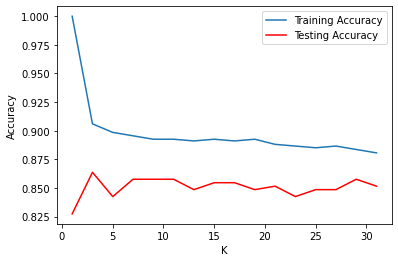

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

#We are plotting our training-testing accurracy graph
print("Training-Testing Accurracy graph according to K value")
plt.plot(k_range, training_accuracy_scores, label="Training Accuracy")
plt.plot(k_range, testing_accuracy_scores,color="red", label="Testing Accuracy")
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [8]:
#Training accuracy according to best K

knn_model=KNeighborsClassifier(n_neighbors= best_k)
knn_model.fit(X_train, y_train)

y_train_pred= knn_model.predict(X_train)
print("Training accuracy according to best K: ", metrics.accuracy_score(y_train, y_train_pred))

Training accuracy according to best K:  0.9059701492537313


In [9]:
#Test accuracy for best K

y_test_pred = knn_model.predict(X_test)
testAccuracy =metrics.accuracy_score(y_test, y_test_pred)
print("Testing accuracy for best K: ", testAccuracy)


Testing accuracy for best K:  0.8636363636363636


## COMMENTS
### While we are choosing best k values in dataset, we look at the places with the highest testing accurracy (testing accurracy is more important than training accurracy). In this dataset highest testing accurracy is on the k=3. So, the best k is 3.
### We don't like overfitting and we add noise to our dataset for avoiding the overfitting. Flexibility and k values are inversely proportional. For our best k, flexibility is very high. It means that our graph is very close to overfitting, our data is not smooth and we have low bias - high variance. Low bias - high variance is not our aim (our aim is low bias - low variance).
### Training and testing accurracy values are very close to each other. This is due to the random distribution of data.